In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
df=pd.read_csv("train.csv")

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.info()
#Most null values in Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df['Cabin'].unique()
#There is not much info which can help us to determine whether person had survived or not, so dropping the column

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [103]:
df.drop("Cabin",axis=1,inplace=True)

In [104]:
df['Age'].mean()

29.69911764705882

In [105]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [106]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [107]:
df['Embarked'].mode()

0    S
dtype: object

In [108]:
df['Embarked'].fillna('S',inplace=True)

In [109]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [113]:
from sklearn.preprocessing import LabelEncoder

In [148]:
#Array of independent variables
independ=df.iloc[:,2:11]

In [115]:
#independ['PassengerId']=df.iloc[:,0]

In [149]:
independ

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [150]:
##Dropping name since we cannot have characters in KNN
independ.drop('Name',axis=1,inplace=True)
independ.drop('Ticket',axis=1,inplace=True)

In [151]:
ind_labelEnc= LabelEncoder()

In [152]:
independ['Sex']=ind_labelEnc.fit_transform(independ['Sex'])
independ['Embarked']=ind_labelEnc.fit_transform(independ['Embarked'])

In [153]:
independ

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [154]:
print(independ.values)

[[ 3.          1.         22.         ...  0.          7.25
   2.        ]
 [ 1.          0.         38.         ...  0.         71.2833
   0.        ]
 [ 3.          0.         26.         ...  0.          7.925
   2.        ]
 ...
 [ 3.          0.         29.69911765 ...  2.         23.45
   2.        ]
 [ 1.          1.         26.         ...  0.         30.
   0.        ]
 [ 3.          1.         32.         ...  0.          7.75
   1.        ]]


In [155]:
depend=df.iloc[:,1]

In [156]:
depend

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
ind_train, ind_test, dep_train, dep_test=train_test_split(independ, depend, test_size=0.2,random_state=0)

In [159]:
ind_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,0,29.699118,0,2,15.2458,0
439,2,1,31.000000,0,0,10.5000,2
817,2,1,31.000000,1,1,37.0042,0
378,3,1,20.000000,0,0,4.0125,0
491,3,1,21.000000,0,0,7.2500,2
...,...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583,0
192,3,0,19.000000,1,0,7.8542,2
629,3,1,29.699118,0,0,7.7333,1
559,3,0,36.000000,1,0,17.4000,2


In [160]:
ind_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,29.699118,0,0,14.4583,0
648,3,1,29.699118,0,0,7.5500,2
278,3,1,7.000000,4,1,29.1250,1
31,1,0,29.699118,1,0,146.5208,0
255,3,0,29.000000,0,2,15.2458,0
...,...,...,...,...,...,...,...
780,3,0,13.000000,0,0,7.2292,0
837,3,1,29.699118,0,0,8.0500,2
215,1,0,31.000000,1,0,113.2750,0
833,3,1,23.000000,0,0,7.8542,2


In [161]:
dep_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [162]:
dep_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(ind_train,dep_train)

KNeighborsClassifier(n_neighbors=3)

In [165]:
dep_pred=knn.predict(ind_test)

In [166]:
dep_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [168]:
print(confusion_matrix(dep_test,dep_pred))

[[96 14]
 [36 33]]


In [169]:
print(accuracy_score(dep_test,dep_pred))

0.7206703910614525


In [170]:
print(classification_report(dep_test,dep_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       110
           1       0.70      0.48      0.57        69

    accuracy                           0.72       179
   macro avg       0.71      0.68      0.68       179
weighted avg       0.72      0.72      0.71       179



In [171]:
error_rate= []

for i in range(1,12):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(ind_train,dep_train)
    pred_i=knn.predict(ind_test)
    error_rate.append(np.mean(pred_i != dep_test))

In [172]:
error_rate

[0.329608938547486,
 0.2905027932960894,
 0.27932960893854747,
 0.29608938547486036,
 0.2569832402234637,
 0.26256983240223464,
 0.22905027932960895,
 0.2905027932960894,
 0.25139664804469275,
 0.2569832402234637,
 0.25139664804469275]

<AxesSubplot:>

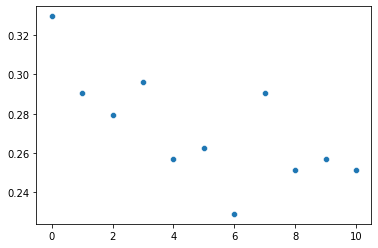

In [173]:
sns.scatterplot(data=error_rate)

In [ ]:
0.22905027932960895